In [1]:
!pip install git+https://github.com/goolig/dsClass.git

  Cloning https://github.com/goolig/dsClass.git to /tmp/pip-req-build-dn7vrdz0
  Running command git clone -q https://github.com/goolig/dsClass.git /tmp/pip-req-build-dn7vrdz0
     |████████████████████████████████| 286kB 2.7MB/s 
  Created wheel for dsClass: filename=dsClass-1.0.27-cp36-none-any.whl size=14168611 sha256=ff180bf4b1ffbc16a848b606a666e891666c46b0a0d3cbd73dbb6f060983b1ea
  Stored in directory: /tmp/pip-ephem-wheel-cache-mxzxk4_n/wheels/c7/a9/03/023d8da4b4e004497715eeb1ea9b5d914ad425036bb4bc10b8
  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp36-none-any.whl size=24566 sha256=6bcc15d0d241e4ebb1336484f135c7fe517250da93d83f14e2511a394378f041
  Stored in directory: /tmp/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built dsClass pydotplus


In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import nltk
#nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer as Lemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import pyLDAvis.gensim
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarit
from gensim.models import ldamulticore 
from gensim.corpora.dictionary import Dictionary
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np
import pickle
from dsClass.path_helper import *
print('great it works')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
great it works


In [3]:
#!pip install pyLDAvis
#!pip install gensim

# Feature selection 

<img src="wiki_NLP.png">

In [4]:
text = '''The history of NLP generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.

The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would be a solved problem.[2] However, real progress was much slower, and after the ALPAC report in 1966, which found that ten-year-long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced. Little further research in machine translation was conducted until the late 1980s, when the first statistical machine translation systems were developed.

Some notably successful NLP systems developed in the 1960s were SHRDLU, a natural language system working in restricted "blocks worlds" with restricted vocabularies, and ELIZA, a simulation of a Rogerian psychotherapist, written by Joseph Weizenbaum between 1964 and 1966. Using almost no information about human thought or emotion, ELIZA sometimes provided a startlingly human-like interaction. When the "patient" exceeded the very small knowledge base, ELIZA might provide a generic response, for example, responding to "My head hurts" with "Why do you say your head hurts?".

During the 1970s, many programmers began to write "conceptual ontologies", which structured real-world information into computer-understandable data. Examples are MARGIE (Schank, 1975), SAM (Cullingford, 1978), PAM (Wilensky, 1978), TaleSpin (Meehan, 1976), QUALM (Lehnert, 1977), Politics (Carbonell, 1979), and Plot Units (Lehnert 1981). During this time, many chatterbots were written including PARRY, Racter, and Jabberwacky.

Up to the 1980s, most NLP systems were based on complex sets of hand-written rules. Starting in the late 1980s, however, there was a revolution in NLP with the introduction of machine learning algorithms for language processing. This was due to both the steady increase in computational power (see Moore's law) and the gradual lessening of the dominance of Chomskyan theories of linguistics (e.g. transformational grammar), whose theoretical underpinnings discouraged the sort of corpus linguistics that underlies the machine-learning approach to language processing.[3] Some of the earliest-used machine learning algorithms, such as decision trees, produced systems of hard if-then rules similar to existing hand-written rules. However, part-of-speech tagging introduced the use of hidden Markov models to NLP, and increasingly, research has focused on statistical models, which make soft, probabilistic decisions based on attaching real-valued weights to the features making up the input data. The cache language models upon which many speech recognition systems now rely are examples of such statistical models. Such models are generally more robust when given unfamiliar input, especially input that contains errors (as is very common for real-world data), and produce more reliable results when integrated into a larger system comprising multiple subtasks.

Many of the notable early successes occurred in the field of machine translation, due especially to work at IBM Research, where successively more complicated statistical models were developed. These systems were able to take advantage of existing multilingual textual corpora that had been produced by the Parliament of Canada and the European Union as a result of laws calling for the translation of all governmental proceedings into all official languages of the corresponding systems of government. However, most other systems depended on corpora specifically developed for the tasks implemented by these systems, which was (and often continues to be) a major limitation in the success of these systems. As a result, a great deal of research has gone into methods of more effectively learning from limited amounts of data.

Recent research has increasingly focused on unsupervised and semi-supervised learning algorithms. Such algorithms are able to learn from data that has not been hand-annotated with the desired answers, or using a combination of annotated and non-annotated data. Generally, this task is much more difficult than supervised learning, and typically produces less accurate results for a given amount of input data. However, there is an enormous amount of non-annotated data available (including, among other things, the entire content of the World Wide Web), which can often make up for the inferior results.

In recent years, there has been a flurry of results showing deep learning techniques[4][5] achieving state-of-the-art results in many natural language tasks, for example in language modeling,[6] parsing,[7][8] and many others.'''

corpus = [line for line in text.splitlines() if line != '']

In [5]:
corpus[0]

'The history of NLP generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.'

## Tokenization

In [6]:
cv = CountVectorizer(lowercase=False)
termMatrix = cv.fit_transform(corpus)
df = pd.DataFrame(data=termMatrix.toarray(),columns=cv.get_feature_names())
df

,1950,1950s,1954,1960s,1964,1966,1970s,1975,1976,1977,...,working,world,worlds,would,write,written,year,years,you,your
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,0,1,1,1,0,0,0,0,...,1,0,1,0,0,1,0,0,1,1
3,0,0,0,0,0,0,1,1,1,1,...,0,1,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
print (corpus[0])
df.iloc[0][df.iloc[0]>0]

The history of NLP generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.


1950            1
1950s           1
Alan            1
Computing       1
In              1
Intelligence    1
Machinery       1
NLP             1
The             1
Turing          2
although        1
an              1
and             1
article         1
as              1
be              1
called          1
can             1
criterion       1
earlier         1
found           1
from            1
generally       1
history         1
in              1
intelligence    1
is              1
now             1
of              2
periods         1
proposed        1
published       1
started         1
test            1
the             2
titled          1
what            1
which           1
work            1
Name: 0, dtype: int64

## Removing all punctuation, numbers and stop words

In [8]:
cv = CountVectorizer(analyzer="word",token_pattern='(?u)\\b[a-zA-Z][a-zA-Z]+\\b',stop_words=set(stopwords.words('english')))
termMatrix = cv.fit_transform(corpus)
df = pd.DataFrame(data=termMatrix.toarray(),columns=cv.get_feature_names())
df

,able,accurate,achieving,advantage,alan,algorithms,almost,alpac,although,among,...,within,work,working,world,worlds,would,write,written,year,years
0,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4,0,0,0,0,0,2,0,0,0,0,...,0,0,0,1,0,0,0,2,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,1,1,0,0,0,2,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
print (corpus[0])
df.iloc[0][df.iloc[0]>0]

The history of NLP generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.


alan            1
although        1
article         1
called          1
computing       1
criterion       1
earlier         1
found           1
generally       1
history         1
intelligence    2
machinery       1
nlp             1
periods         1
proposed        1
published       1
started         1
test            1
titled          1
turing          2
work            1
Name: 0, dtype: int64

## Bigram

In [10]:
cv = CountVectorizer(analyzer="word",token_pattern='(?u)\\b[a-zA-Z][a-zA-Z]+\\b',stop_words=set(stopwords.words('english')),ngram_range=(1,2))
termMatrix = cv.fit_transform(corpus)
df = pd.DataFrame(data=termMatrix.toarray(),columns=cv.get_feature_names())
df

,able,able learn,able take,accurate,accurate results,achieving,achieving state,advantage,advantage existing,alan,...,write conceptual,written,written including,written joseph,written rules,year,year long,years,years flurry,years machine
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
5,1,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [11]:
print (corpus[0])
df.iloc[0][df.iloc[0]>0]

The history of NLP generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.


alan                      1
alan turing               1
although                  1
although work             1
article                   1
article titled            1
called                    1
called turing             1
computing                 1
computing machinery       1
criterion                 1
criterion intelligence    1
earlier                   1
earlier periods           1
found                     1
found earlier             1
generally                 1
generally started         1
history                   1
history nlp               1
intelligence              2
intelligence proposed     1
machinery                 1
machinery intelligence    1
nlp                       1
nlp generally             1
periods                   1
periods alan              1
proposed                  1
proposed called           1
published                 1
published article         1
started                   1
started although          1
test                      1
test criterion      

## Test set

<img src="wiki_NLU.jpg">

In [12]:
testText = '''The program STUDENT, written in 1964 by Daniel Bobrow for his PhD dissertation at MIT is one of the earliest known attempts at natural-language understanding by a computer.[6][7][8][9][10] Eight years after John McCarthy coined the term artificial intelligence, Bobrow's dissertation (titled Natural Language Input for a Computer Problem Solving System) showed how a computer could understand simple natural language input to solve algebra word problems.

A year later, in 1965, Joseph Weizenbaum at MIT wrote ELIZA, an interactive program that carried on a dialogue in English on any topic, the most popular being psychotherapy. ELIZA worked by simple parsing and substitution of key words into canned phrases and Weizenbaum sidestepped the problem of giving the program a database of real-world knowledge or a rich lexicon. Yet ELIZA gained surprising popularity as a toy project and can be seen as a very early precursor to current commercial systems such as those used by Ask.com.[11]

In 1969 Roger Schank at Stanford University introduced the conceptual dependency theory for natural-language understanding.[12] This model, partially influenced by the work of Sydney Lamb, was extensively used by Schank's students at Yale University, such as Robert Wilensky, Wendy Lehnert, and Janet Kolodner.

In 1970, William A. Woods introduced the augmented transition network (ATN) to represent natural language input.[13] Instead of phrase structure rules ATNs used an equivalent set of finite state automata that were called recursively. ATNs and their more general format called "generalized ATNs" continued to be used for a number of years.

In 1971 Terry Winograd finished writing SHRDLU for his PhD thesis at MIT. SHRDLU could understand simple English sentences in a restricted world of children's blocks to direct a robotic arm to move items. The successful demonstration of SHRDLU provided significant momentum for continued research in the field.[14][15] Winograd continued to be a major influence in the field with the publication of his book Language as a Cognitive Process.[16] At Stanford, Winograd would later be the adviser for Larry Page, who co-founded Google.

In the 1970s and 1980s the natural language processing group at SRI International continued research and development in the field. A number of commercial efforts based on the research were undertaken, e.g., in 1982 Gary Hendrix formed Symantec Corporation originally as a company for developing a natural language interface for database queries on personal computers. However, with the advent of mouse driven, graphic user interfaces Symantec changed direction. A number of other commercial efforts were started around the same time, e.g., Larry R. Harris at the Artificial Intelligence Corporation and Roger Schank and his students at Cognitive Systems corp.[17][18] In 1983, Michael Dyer developed the BORIS system at Yale which bore similarities to the work of Roger Schank and W. G. Lehnart.[19]

The third millennium saw the introduction of systems using machine learning for text classification, such as the IBM Watson. However, it is debated how much "understanding" such systems demonstrate, e.g. according to John Searle, Watson did not even understand the questions.[20]

John Ball, cognitive scientist and inventor of Patom Theory supports this assessment. Natural language processing has made inroads for applications to support human productivity in service and ecommerce but this has largely been made possible by narrowing the scope of the application. There are thousands of ways to request something in a human language which still defies conventional natural language processing. "To have a meaningful conversation with machines is only possible when we match every word to the correct meaning based on the meanings of the other words in the sentence – just like a 3-year-old does without guesswork" Patom Theory'''

testCorpus = [line for line in testText.splitlines() if line != '']

In [13]:
testTermMatrix = cv.transform(testCorpus)
testDf = pd.DataFrame(data=testTermMatrix.toarray(),columns=cv.get_feature_names())
testDf

,able,able learn,able take,accurate,accurate results,achieving,achieving state,advantage,advantage existing,alan,...,write conceptual,written,written including,written joseph,written rules,year,year long,years,years flurry,years machine
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [14]:
print (testCorpus[0])
testDf.iloc[0][testDf.iloc[0]>0]

The program STUDENT, written in 1964 by Daniel Bobrow for his PhD dissertation at MIT is one of the earliest known attempts at natural-language understanding by a computer.[6][7][8][9][10] Eight years after John McCarthy coined the term artificial intelligence, Bobrow's dissertation (titled Natural Language Input for a Computer Problem Solving System) showed how a computer could understand simple natural language input to solve algebra word problems.


computer            3
earliest            1
input               2
intelligence        1
language            3
natural             3
natural language    3
problem             1
system              1
titled              1
written             1
years               1
Name: 0, dtype: int64

## Lemmatization

In [15]:
lemmatizer = Lemmatizer()
print (lemmatizer.lemmatize('ate',pos='v'))
print(lemmatizer.lemmatize('leaves'))

eat
leaf


### As opposed to stemming

In [16]:
stemmer = PorterStemmer()
print (stemmer.stem('ate'))
print(stemmer.stem('leaves'))

ate
leav


# Topic modeling

In [17]:
# Load some categories 
categories = [
    'sci.space',
    'alt.atheism',
    'comp.graphics',
    'rec.sport.baseball'
]

print("Loading 20 newsgroups dataset for categories:")
print(categories)
trainDataset = fetch_20newsgroups(categories=categories,subset='train',shuffle=True, remove=('headers', 'footers', 'quotes'))
testDataset = fetch_20newsgroups(categories=categories,subset='test',shuffle=True, remove=('headers', 'footers', 'quotes'))
print("%d documents for training" % len(trainDataset.data))
print("%d documents for testing" % len(testDataset.data))
print("%d categories" % len(trainDataset.target_names))

Loading 20 newsgroups dataset for categories:
['sci.space', 'alt.atheism', 'comp.graphics', 'rec.sport.baseball']
2254 documents for training
1499 documents for testing
4 categories


# Data preparation 

## Filter out small docs

In [18]:
def filterSmallDocs(docs,targets):
    indices = [i for i in range(0,len(docs)) if len(docs[i].split())>20]
    filteredDocs = [docs[i] for i in indices]
    filteredTarget = [targets[i] for i in indices]
    return filteredDocs,filteredTarget

In [19]:
trainDocs, trainTarget = filterSmallDocs(trainDataset.data,trainDataset.target)
testDocs, testTarget = filterSmallDocs(testDataset.data,testDataset.target)

## How does the docs distribute over the topics

3    534
1    516
2    490
0    425
dtype: int64

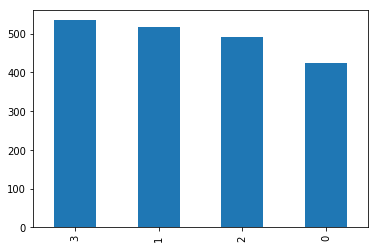

In [20]:
pd.Series(trainTarget).value_counts().plot(kind='bar')
pd.Series(trainTarget).value_counts()

3    349
1    346
2    338
0    278
dtype: int64

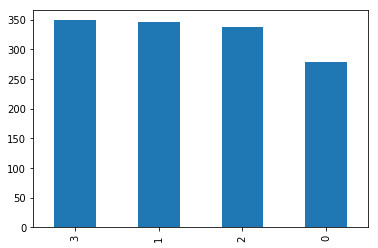

In [21]:
pd.Series(testTarget).value_counts().plot(kind='bar')
pd.Series(testTarget).value_counts()

In [22]:
cv = CountVectorizer(analyzer="word",token_pattern='(?u)\\b[a-zA-Z][a-zA-Z]+\\b',stop_words='english',min_df=50, max_df=0.8, ngram_range=(1,2))
data = cv.fit_transform(trainDocs)
data = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
data.iloc[0:3]

,able,access,actually,add,address,advance,ago,agree,al,answer,...,working,works,world,wouldn,write,written,wrong,year,years,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0


## Convert the term matrix into term lists

In [23]:
cols = data.columns
bt = data.apply(lambda x: x > 0)
bt = bt.apply(lambda x: list(cols[x.values]), axis=1)
bt[0:3]

0                 [built, don, don think, just, think]
1    [ask, bit, change, don, file, heard, just, kno...
2    [based, didn, edu, know, line, mac, programs, ...
dtype: object

## Turn our tokenized documents into an id term, frequancy list

In [24]:
dictionary = Dictionary(bt)
# convert tokenized documents into a document-term matrix
corpusTopicModeling = [dictionary.doc2bow(text) for text in bt]
corpusTopicModeling[0:3]

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(1, 1),
  (3, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1)],
 [(10, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1)]]

In [25]:
dictionary[0]

'built'

In [26]:
print("The model has %d features" % (len(dictionary)))

The model has 340 features


# Modeling

In [27]:
#ldaModel = ldamulticore.LdaMulticore(corpus=corpus, id2word=dictionary, passes=150, num_topics=4)

In [28]:
#with open('ldaModel.pickle', 'wb') as handle:
#    pickle.dump(ldaModel, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(get_file_path('ldaModel.pickle'), 'rb') as handle:
    ldaModel = pickle.load(handle)

In [29]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldaModel, corpusTopicModeling,dictionary,R=20,mds="tsne")

PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
1       7.335405 -277.268372       1        1  37.313919
3     -84.281311 -232.048615       2        1  21.360069
2     -39.064224 -140.430588       3        1  21.046087
0      52.552490 -185.650314       4        1  20.279921, topic_info=    Category        Freq      Term       Total  loglift  logprob
48   Default  235.000000     space  235.000000  20.0000  20.0000
113  Default  199.000000    thanks  199.000000  19.0000  19.0000
251  Default  236.000000      year  236.000000  18.0000  18.0000
181  Default  129.000000  graphics  129.000000  17.0000  17.0000
196  Default  120.000000      game  120.000000  16.0000  16.0000
..       ...         ...       ...         ...      ...      ...
11    Topic4  110.454834      like  469.698700   0.1481  -4.1189
3     Topic4  102.687080      just  433.316803   0.1558  -4.1918
74    Topic4   93.662056      time  331.047974   0.3330  -4.2838
1     Topic4   84.001091       don  445.753723  -0.0734  -4.3926
41    Topic4   74.475250        ll  183.090454   0.6960  -4.5130

[153 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
165       2  0.988275  address
239       2  0.969745  advance
239       4  0.014919  advance
325       1  0.976680    agree
325       4  0.013198    agree
...     ...       ...      ...
251       3  0.265949     year
251       4  0.730305     year
51        1  0.128071    years
51        3  0.430320    years
51        4  0.435443    years

[257 rows x 3 columns], R=20, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

In [30]:
 ldaModel.show_topics(formatted=False)

[(0,
  [('year', 0.025458157),
   ('game', 0.017570145),
   ('like', 0.016263098),
   ('think', 0.01620684),
   ('good', 0.016142676),
   ('team', 0.015898217),
   ('just', 0.015119392),
   ('games', 0.014063816),
   ('time', 0.01379057),
   ('baseball', 0.012894804)]),
 (1,
  [('don', 0.024067786),
   ('think', 0.020810897),
   ('just', 0.018352589),
   ('people', 0.018069614),
   ('like', 0.015503514),
   ('say', 0.014905944),
   ('know', 0.013641485),
   ('does', 0.012891971),
   ('way', 0.010932128),
   ('thing', 0.010241804)]),
 (2,
  [('space', 0.033328358),
   ('nasa', 0.016827945),
   ('earth', 0.014880039),
   ('new', 0.0126420595),
   ('orbit', 0.012416884),
   ('years', 0.011970996),
   ('time', 0.01165617),
   ('long', 0.01153383),
   ('launch', 0.011420396),
   ('high', 0.010989247)]),
 (3,
  [('thanks', 0.027171412),
   ('know', 0.020599812),
   ('graphics', 0.01794252),
   ('information', 0.016441157),
   ('mail', 0.016423808),
   ('does', 0.01616163),
   ('program', 0.0

# Tasks
### <br> 1. Annotate the topics. I.e., label them based on the word distrubution.




### Q1 <br>
'sci.space = 2<br>
'alt.atheism' = 1<br>
'comp.graphics' = 3<br>
'rec.sport.baseball' = 0

In [31]:
topic_annotations = {0: 'rec.sport.baseball', 3:'comp.graphics', 2: 'sci.space', 1: 'alt.atheism'}

In [32]:
label_annotations = {0: 'sci.space', 1: 'alt.atheism', 2: 'comp.graphics', 3: 'rec.sport.baseball']}

SyntaxError: invalid syntax (<ipython-input-32-6e7bc5ab3b0a>, line 1)

### <br> 2. Build an accuracy function and explain it and how the characteristics of the LDA are used in the propused accuracy model.

define a function that recieves set of observation and return the accuracy.

In [33]:
ldaModel.predict(trainDataset)

AttributeError: 'LdaMulticore' object has no attribute 'predict'

In [34]:
trainDataset.data

["\nA 68070 is just a 68010 with a built in MMU.  I don't even think that Moto.\nmanufactures them.\n\n                                  - Ian Romanick\n                                    Dancing Fool of Epsilon",
 "Hello, I realize that this might be a FAQ but I have to ask since I don't get a\nchange to read this newsgroup very often.  Anyways for my senior project I need\nto convert an AutoCad file to a TIFF file.  Please I don't need anyone telling\nme that the AutoCAD file is a vector file and the TIFF is a bit map since I\nhave heard that about 100 times already I would just like to know if anyone\nknows how to do this or at least point me to the right direction.",
 '\n\n\nHow do you know it\'s based on ignorance, couldn\'t that be wrong? Why would it\nbe wrong \nto fall into the trap that you mentioned? \n\nAlso, if I may, what the heck where we talking about and why didn\'t I keep \nsome comments on there to see what the line of thoughts were?\n\nMAC\n \n\n\n\n\n\n--\n********

In [35]:
ldaModel.get_document_topics(corpusTopicModeling[0])

[(0, 0.04360857), (1, 0.6665405), (2, 0.24787588), (3, 0.041975055)]

In [36]:
trainTarget

[1,
 1,
 0,
 3,
 3,
 3,
 1,
 0,
 1,
 2,
 1,
 3,
 2,
 1,
 0,
 3,
 3,
 0,
 3,
 1,
 1,
 1,
 3,
 2,
 1,
 3,
 3,
 2,
 1,
 1,
 3,
 2,
 1,
 3,
 1,
 3,
 2,
 2,
 1,
 2,
 1,
 0,
 3,
 2,
 1,
 0,
 3,
 0,
 3,
 1,
 0,
 2,
 2,
 2,
 1,
 0,
 1,
 3,
 0,
 2,
 3,
 1,
 2,
 2,
 1,
 3,
 2,
 1,
 0,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 2,
 0,
 3,
 0,
 2,
 1,
 2,
 3,
 0,
 0,
 1,
 0,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 3,
 3,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 1,
 3,
 1,
 0,
 3,
 1,
 2,
 2,
 3,
 1,
 1,
 3,
 3,
 2,
 2,
 3,
 1,
 1,
 1,
 0,
 2,
 2,
 0,
 3,
 1,
 0,
 0,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 1,
 1,
 0,
 1,
 2,
 3,
 3,
 0,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 0,
 2,
 3,
 0,
 2,
 0,
 0,
 3,
 1,
 3,
 2,
 2,
 3,
 0,
 3,
 3,
 3,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 0,
 1,
 3,
 1,
 0,
 1,
 3,
 0,
 3,
 3,
 2,
 2,
 3,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 0,
 1,
 2,
 2,
 3,
 3,
 0,
 2,
 2,
 3,
 2,
 0,
 1,
 0,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 2,
 3,
 0,
 2,
 0,
 1,
 0,
 2,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 0,
 1,
 1,


In [37]:
#Q2
def accuracy(ldaModel, corpusTopicModeling, topicAnnotation, trainDataset, trainTarget):
    train_vecs = []
    
    for i in range(len(trainDataset)):
        top_topics = ldaModel.get_document_topics(trainDataset[i], minimum_probability=0.0)
        topic_vec = [top_topics[i][1] for i in range(20)]
        topic_vec.extend([rev_train.iloc[i].real_counts]) # counts of reviews for restaurant
        topic_vec.extend([len(rev_train.iloc[i].text)]) # length review
        train_vecs.append(topic_vec)
    

In [38]:
len(corpusTopicModeling)

1965

### <br> 3. Evalute the model on the train dataset.


use the function from q2 on the train set.

In [39]:
#Q3

### <br> 4. Evalute the model on the test dataset.


use the function from q2 on the test set.

In [40]:
#Q4

### <br> 5. Explain the difference in the evaluations.


In [41]:
#Q5